   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

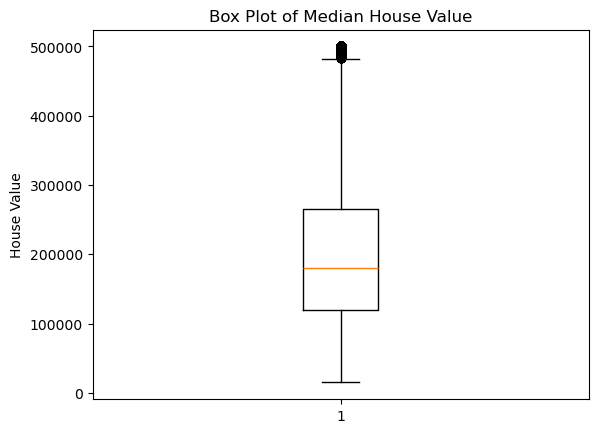

   rooms_per_household  bedrooms_per_room  population_per_household
0             6.984127           0.146591                  2.555556
1             6.238137           0.155797                  2.109842
2             8.288136           0.129516                  2.802260
3             5.817352           0.184458                  2.547945
4             6.281853           0.172096                  2.181467
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-nu

In [1]:
# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# 2. Load Dataset
# ===============================
df = pd.read_csv("housing.csv")
print(df.head())
print(df.info())

# ===============================
# 3. Outlier Detection (IQR Method)
# ===============================
numeric_cols = df.select_dtypes(include=np.number).columns

outlier_count = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count[col] = outliers.shape[0]

print("Outlier count per column:")
print(outlier_count)

# ===============================
# 4. Box Plot (Example)
# ===============================
plt.figure()
plt.boxplot(df["median_house_value"].dropna())
plt.title("Box Plot of Median House Value")
plt.ylabel("House Value")
plt.show()

# ===============================
# 5. Feature Engineering
# ===============================
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

print(df[[
    "rooms_per_household",
    "bedrooms_per_room",
    "population_per_household"
]].head())

# ===============================
# 6. Final Dataset Info
# ===============================
print(df.info())
